# KNN Traning

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris



import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor


In [65]:
models = [
     {
         "name": "KNN",
     "model": KNeighborsRegressor(n_neighbors=10)
     },
    {
        "name": "Linear Regression",
        "model": LinearRegression()
     },
    {
        "name": "Random Forest",
        "model": RandomForestRegressor(n_estimators=100)
    },
    {
        "name": "Decision Tree",
        "model": DecisionTreeRegressor()
    },
   {     "name": "XGBoost",
        "model": XGBRegressor(
        n_estimators=300,       # number of trees
        learning_rate=0.05,     # smaller = slower but more accurate
        max_depth=6,            # tree depth
        subsample=0.8,          # use 80% of data per tree
        colsample_bytree=0.8,   # use 80% of features per tree
        random_state=42
        )     }
        
        ,
    { 'name': 'LightGBM', 'model': LGBMRegressor(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    ) },
]

results = []





In [66]:
# Load datasets from pickle file
from pickle import load
datasets = load(open('datasets.pkl', 'rb'))

In [67]:
# Evaluate each model on the dataset
for dataset in datasets:
    X_train = dataset["X_train"]
    X_test = dataset["X_test"]
    y_train = dataset["y_train"]
    y_test = dataset["y_test"]

    for model in models:
        model_name = model["name"]
        print("Training", model_name, dataset["name"], flush=True)
        model_instance = model["model"]
        model_instance.fit(X_train, y_train)
        y_pred = model_instance.predict(X_test)
        r2_score_value = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        results.append({
            "model": model_name,
            "dataset": dataset["name"],
            "R2 score": r2_score_value,
            "MAE": mae,
            "MSE": mse,
            "RMSE": rmse
        })

# Convert results to DataFrame
results_df = pd.DataFrame(results)
results_df

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002642 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2630
[LightGBM] [Info] Number of data points in the train set: 186112, number of used features: 51
[LightGBM] [Info] Start training from score 41.170430
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002587 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2630
[LightGBM] [Info] Number of data points in the train set: 186112, number of used features: 51
[LightGBM] [Info] Start training from score 41.170430
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002425 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not e

,model,dataset,R2 score,MAE,MSE,RMSE
0,KNN,with robust,0.656364,8.020695,113.722180,10.664060
1,Linear Regression,with robust,0.625915,8.354649,123.798607,11.126482
2,Random Forest,with robust,0.709140,7.355473,96.256539,9.811042
3,Decision Tree,with robust,0.395440,10.321094,200.071655,14.144669
4,XGBoost,with robust,0.707421,7.385321,96.825451,9.839992
5,LightGBM,with robust,0.705746,7.406970,97.379763,9.868118
6,KNN,with minmax,0.662783,7.884683,111.597768,10.563984
7,Linear Regression,with minmax,0.625915,8.354649,123.798607,11.126482
8,Random Forest,with minmax,0.709185,7.360767,96.241499,9.810275
9,Decision Tree,with minmax,0.401861,10.282988,197.946486,14.069346


Result: XGBoost has the best results with standart scaler. Now it's hyperparameter tuning time.

## Hyperparamater Tuning

In [81]:
# Random search for hyperparameter tuning of RandomForest
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
# Define the parameter grid
param_dist = {
     'n_estimators': [100, 200, 300, 500, 800],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
    
}

param_dist

{'n_estimators': [100, 200, 300, 500, 800],
 'max_depth': [None, 10, 20, 30, 40, 50],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'max_features': ['auto', 'sqrt', 'log2'],
 'bootstrap': [True, False]}

In [82]:
RF_reg = RandomForestRegressor()
RF_random = RandomizedSearchCV(estimator = RF_reg, param_distributions = param_dist, n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs = -1)
for dataset in datasets:
    if dataset["name"] == "with robust":
        X_train = dataset["X_train"]
        X_test = dataset["X_test"]
        y_train = dataset["y_train"]
        y_test = dataset["y_test"]
RF_random.fit(X_train, y_train)
RF_random.best_params_

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; t

/opt/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=  41.0s
[CV] END bootstrap=False, max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  47.9s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=  42.3s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=  43.5s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time= 2.9min
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time= 2.9min
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time= 2.9min
[CV] END bootstrap=False, max_depth

/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
69 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
58 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/opt/anaconda3/lib/python3.12/site-pac

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 50,
 'bootstrap': False}

In [85]:
# apply best hyperparameters and evaluate RandomForest with robust
best_RF = RandomForestRegressor(
    n_estimators=200,
    min_samples_split = 5,
    min_samples_leaf= 2,
    max_features= 'sqrt',
    max_depth= 50,
    bootstrap= False
)
best_RF.fit(X_train, y_train)
y_pred = best_RF.predict(X_test)
r2_score_value = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
results.append({
    "model": "RandomForest with best hyperparameters",
    "dataset": "with robust",
    "R2 score": r2_score_value,
    "MAE": mae,
    "MSE": mse,
    "RMSE": rmse
})
# Convert results to DataFrame
results_df = pd.DataFrame(results)
results_df

,model,dataset,R2 score,MAE,MSE,RMSE
0,KNN,with robust,0.656364,8.020695,113.722180,10.664060
1,Linear Regression,with robust,0.625915,8.354649,123.798607,11.126482
2,Random Forest,with robust,0.709140,7.355473,96.256539,9.811042
3,Decision Tree,with robust,0.395440,10.321094,200.071655,14.144669
4,XGBoost,with robust,0.707421,7.385321,96.825451,9.839992
5,LightGBM,with robust,0.705746,7.406970,97.379763,9.868118
6,KNN,with minmax,0.662783,7.884683,111.597768,10.563984
7,Linear Regression,with minmax,0.625915,8.354649,123.798607,11.126482
8,Random Forest,with minmax,0.709185,7.360767,96.241499,9.810275
9,Decision Tree,with minmax,0.401861,10.282988,197.946486,14.069346


In [68]:
#    {     "name": "XGBoost",
#         "model": XGBRegressor(
#         n_estimators=300,       # number of trees
#         learning_rate=0.05,     # smaller = slower but more accurate
#         max_depth=6,            # tree depth
#         subsample=0.8,          # use 80% of data per tree
#         colsample_bytree=0.8,   # use 80% of features per tree
#         random_state=42
#         )
#     },

In [69]:
# Random search for hyperparameter tuning of XGBoost
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
# Define the parameter grid
param_dist = {
    'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
    'learning_rate': [float(x) for x in np.linspace(start = 0.01, stop = 1, num = 10)], 
    'max_depth': [int(x) for x in np.linspace(start = 1, stop = 15, num = 10)],
    'subsample': [float(x) for x in np.linspace(start = 0.1, stop = 1, num = 10)],
    'colsample_bytree': [float(x) for x in np.linspace(start = 0.1, stop = 1, num = 10)],
    'random_state' : [42]
    
}

param_dist

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
 'learning_rate': [0.01, 0.12, 0.23, 0.34, 0.45, 0.56, 0.67, 0.78, 0.89, 1.0],
 'max_depth': [1, 2, 4, 5, 7, 8, 10, 11, 13, 15],
 'subsample': [0.1,
  0.2,
  0.30000000000000004,
  0.4,
  0.5,
  0.6,
  0.7000000000000001,
  0.8,
  0.9,
  1.0],
 'colsample_bytree': [0.1,
  0.2,
  0.30000000000000004,
  0.4,
  0.5,
  0.6,
  0.7000000000000001,
  0.8,
  0.9,
  1.0],
 'random_state': [42]}

In [70]:
XG_reg = XGBRegressor()
XG_random = RandomizedSearchCV(estimator = XG_reg, param_distributions = param_dist, n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs = -1)
for dataset in datasets:
    if dataset["name"] == "with standart":
        X_train = dataset["X_train"]
        X_test = dataset["X_test"]
        y_train = dataset["y_train"]
        y_test = dataset["y_test"]
XG_random.fit(X_train, y_train)
XG_random.best_params_


Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END colsample_bytree=0.8, learning_rate=0.67, max_depth=13, n_estimators=600, random_state=42, subsample=0.1; total time=  21.0s
[CV] END colsample_bytree=0.8, learning_rate=0.67, max_depth=13, n_estimators=600, random_state=42, subsample=0.1; total time=  21.6s
[CV] END colsample_bytree=0.8, learning_rate=0.67, max_depth=13, n_estimators=600, random_state=42, subsample=0.1; total time=  21.5s
[CV] END colsample_bytree=0.1, learning_rate=0.01, max_depth=13, n_estimators=1400, random_state=42, subsample=0.1; total time=  48.4s
[CV] END colsample_bytree=0.1, learning_rate=0.01, max_depth=13, n_estimators=1400, random_state=42, subsample=0.1; total time=  48.6s
[CV] END colsample_bytree=0.1, learning_rate=0.01, max_depth=13, n_estimators=1400, random_state=42, subsample=0.1; total time=  48.9s
[CV] END colsample_bytree=0.1, learning_rate=0.67, max_depth=4, n_estimators=1400, random_state=42, subsample=0.6; total time=  16.

{'subsample': 0.7000000000000001,
 'random_state': 42,
 'n_estimators': 200,
 'max_depth': 10,
 'learning_rate': 0.12,
 'colsample_bytree': 0.5}

## Best hyperparameters:

 - 'subsample': 0.7,
 - 'random_state': 42,
 - 'n_estimators': 200,
 - 'max_depth': 10,
 - 'learning_rate': 0.12,
 - 'colsample_bytree': 0.5

In [71]:
# apply best hyperparameters and evaluate XGBoost with std scaler
best_XG = XGBRegressor(
    n_estimators=200,
    learning_rate=0.12,
    max_depth=10,
    subsample=0.7,
    colsample_bytree=0.5,
    random_state=42
)
best_XG.fit(X_train, y_train)
y_pred = best_XG.predict(X_test)
r2_score_value = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
results.append({
    "model": "XGBoost with best hyperparameters",
    "dataset": "with standart",
    "R2 score": r2_score_value,
    "MAE": mae,
    "MSE": mse,
    "RMSE": rmse
})
# Convert results to DataFrame
results_df = pd.DataFrame(results)
results_df



,model,dataset,R2 score,MAE,MSE,RMSE
0,KNN,with robust,0.656364,8.020695,113.722180,10.664060
1,Linear Regression,with robust,0.625915,8.354649,123.798607,11.126482
2,Random Forest,with robust,0.709140,7.355473,96.256539,9.811042
3,Decision Tree,with robust,0.395440,10.321094,200.071655,14.144669
4,XGBoost,with robust,0.707421,7.385321,96.825451,9.839992
5,LightGBM,with robust,0.705746,7.406970,97.379763,9.868118
6,KNN,with minmax,0.662783,7.884683,111.597768,10.563984
7,Linear Regression,with minmax,0.625915,8.354649,123.798607,11.126482
8,Random Forest,with minmax,0.709185,7.360767,96.241499,9.810275
9,Decision Tree,with minmax,0.401861,10.282988,197.946486,14.069346


# Optimization of Modelling in different ways

### 1. Residual Analysis

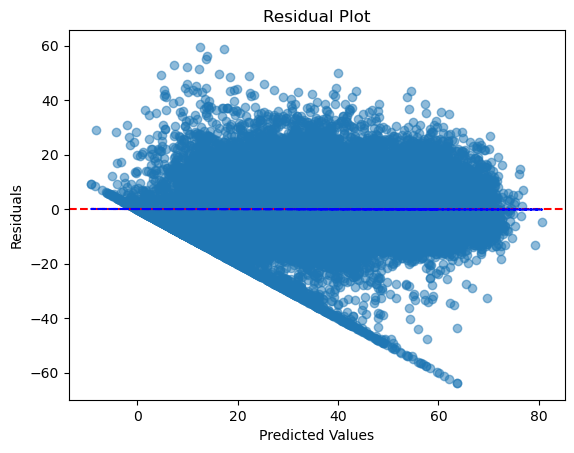

In [72]:
#calculate residuals
residuals = y_test - y_pred
# Plot residuals
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')

## add a trend line
z = np.polyfit(y_pred, residuals, 1)
p = np.poly1d(z)
plt.plot(y_pred, p(y_pred), "b--")
plt.show()


(array([6.025e+03, 1.395e+03, 1.345e+03, 1.239e+03, 1.513e+03, 2.130e+03,
        2.597e+03, 2.576e+03, 2.619e+03, 2.778e+03, 3.386e+03, 4.144e+03,
        4.816e+03, 5.330e+03, 6.194e+03, 6.269e+03, 6.487e+03, 6.372e+03,
        6.604e+03, 6.726e+03, 6.958e+03, 7.281e+03, 7.259e+03, 7.673e+03,
        8.238e+03, 8.691e+03, 8.628e+03, 7.797e+03, 7.240e+03, 6.550e+03,
        5.949e+03, 5.378e+03, 4.343e+03, 3.643e+03, 2.704e+03, 2.120e+03,
        1.616e+03, 1.132e+03, 8.320e+02, 5.480e+02, 3.350e+02, 2.200e+02,
        1.700e+02, 1.070e+02, 5.500e+01, 3.600e+01, 2.500e+01, 1.700e+01,
        1.400e+01, 8.000e+00]),
 array([  0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.,  20.,
         22.,  24.,  26.,  28.,  30.,  32.,  34.,  36.,  38.,  40.,  42.,
         44.,  46.,  48.,  50.,  52.,  54.,  56.,  58.,  60.,  62.,  64.,
         66.,  68.,  70.,  72.,  74.,  76.,  78.,  80.,  82.,  84.,  86.,
         88.,  90.,  92.,  94.,  96.,  98., 100.]),
 <BarContainer object of 50 

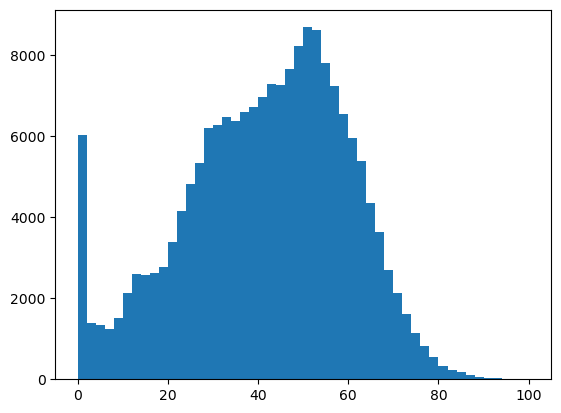

In [73]:
plt.hist(y_train, bins=50)

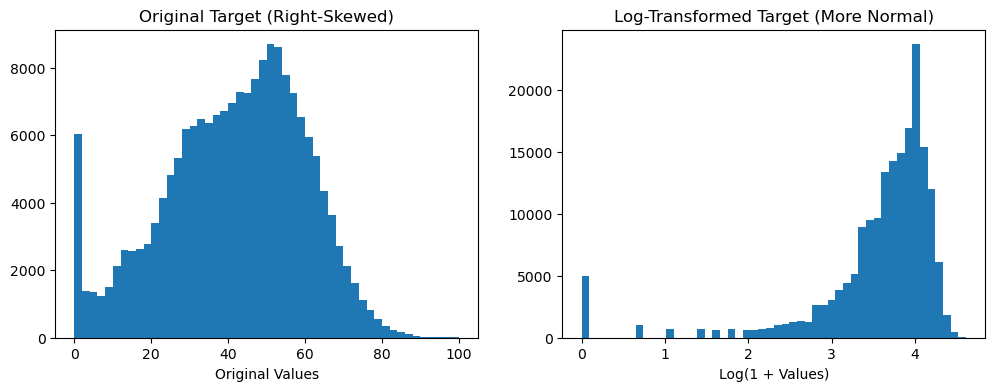

In [74]:
# Transform the target
y_train_log = np.log1p(y_train)  # log(1+x) handles zeros
y_test_log = np.log1p(y_test)

# Check the transformed distribution
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(y_train, bins=50)
plt.title('Original Target (Right-Skewed)')
plt.xlabel('Original Values')

plt.subplot(1, 2, 2)
plt.hist(y_train_log, bins=50)
plt.title('Log-Transformed Target (More Normal)')
plt.xlabel('Log(1 + Values)')
plt.show()

Original Model - R²: 0.7430, MAE: 7.01, RMSE: 9.25
Log Model - R²: 0.6623, MAE: 7.68, RMSE: 10.57


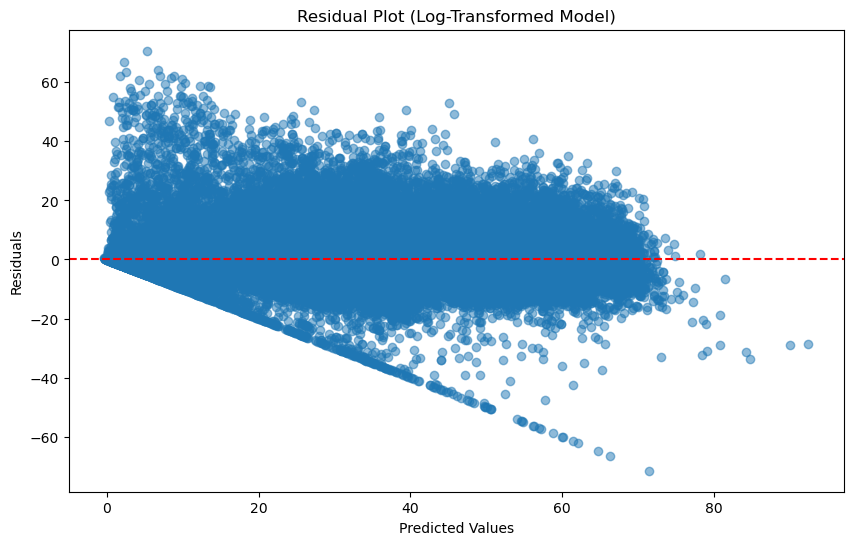

In [75]:
model_log = XGBRegressor(
    n_estimators=200,
    learning_rate=0.12,
    max_depth=10,
    subsample=0.7,
    colsample_bytree=0.5,
    random_state=42 
)  # Use your best params
model_log.fit(X_train, y_train_log)

# Predict and transform back
y_pred_log = model_log.predict(X_test)
y_pred_final = np.expm1(y_pred_log)  # Inverse: exp(x) - 1

# Evaluate
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2_new = r2_score(y_test, y_pred_final)
mae_new = mean_absolute_error(y_test, y_pred_final)
rmse_new = np.sqrt(mean_squared_error(y_test, y_pred_final))

print(f"Original Model - R²: {0.743:.4f}, MAE: {7.01:.2f}, RMSE: {9.25:.2f}")
print(f"Log Model - R²: {r2_new:.4f}, MAE: {mae_new:.2f}, RMSE: {rmse_new:.2f}")

# Check new residuals
residuals_new = y_test - y_pred_final
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_final, residuals_new, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot (Log-Transformed Model)')
plt.show()

Target Variable Statistics:
Q1 (25th percentile): 29.00
Q3 (75th percentile): 55.00
IQR: 26.00
Lower bound: -10.00
Upper bound: 94.00

Outliers in training data:
Below lower bound: 0 (0.00%)
Above upper bound: 32 (0.02%)
Total outliers: 32 (0.02%)


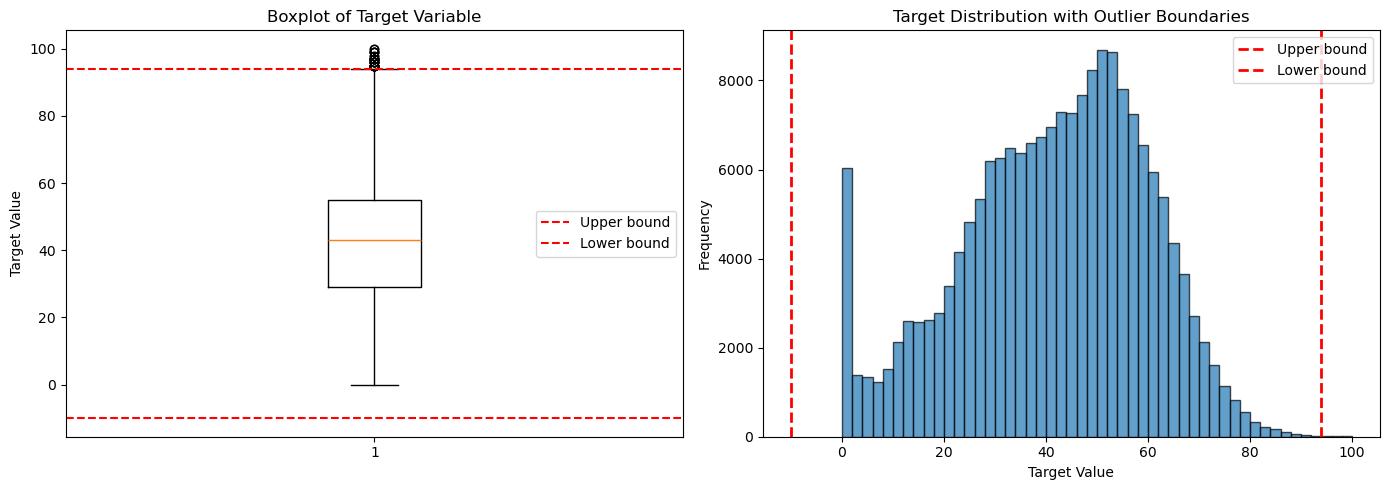

In [76]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate outlier thresholds using IQR method
Q1 = np.percentile(y_train, 25)
Q3 = np.percentile(y_train, 75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Target Variable Statistics:")
print(f"Q1 (25th percentile): {Q1:.2f}")
print(f"Q3 (75th percentile): {Q3:.2f}")
print(f"IQR: {IQR:.2f}")
print(f"Lower bound: {lower_bound:.2f}")
print(f"Upper bound: {upper_bound:.2f}")

# Count outliers
outliers_low = np.sum(y_train < lower_bound)
outliers_high = np.sum(y_train > upper_bound)
total_outliers = outliers_low + outliers_high

print(f"\nOutliers in training data:")
print(f"Below lower bound: {outliers_low} ({outliers_low/len(y_train)*100:.2f}%)")
print(f"Above upper bound: {outliers_high} ({outliers_high/len(y_train)*100:.2f}%)")
print(f"Total outliers: {total_outliers} ({total_outliers/len(y_train)*100:.2f}%)")

# Visualize with boxplot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].boxplot(y_train)
axes[0].set_ylabel('Target Value')
axes[0].set_title('Boxplot of Target Variable')
axes[0].axhline(y=upper_bound, color='r', linestyle='--', label='Upper bound')
axes[0].axhline(y=lower_bound, color='r', linestyle='--', label='Lower bound')
axes[0].legend()

# Histogram with outlier boundaries
axes[1].hist(y_train, bins=50, alpha=0.7, edgecolor='black')
axes[1].axvline(x=upper_bound, color='r', linestyle='--', linewidth=2, label='Upper bound')
axes[1].axvline(x=lower_bound, color='r', linestyle='--', linewidth=2, label='Lower bound')
axes[1].set_xlabel('Target Value')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Target Distribution with Outlier Boundaries')
axes[1].legend()

plt.tight_layout()
plt.show()

In [77]:
# Load column_names from pickle file
from pickle import load
column_names = load(open('column_names.pkl', 'rb'))

In [78]:
column_names

array(['cat__genre_Alternative', 'cat__genre_Anime', 'cat__genre_Blues',
       "cat__genre_Children's Music", 'cat__genre_Classical',
       'cat__genre_Comedy', 'cat__genre_Country', 'cat__genre_Dance',
       'cat__genre_Electronic', 'cat__genre_Folk', 'cat__genre_Hip-Hop',
       'cat__genre_Indie', 'cat__genre_Jazz', 'cat__genre_Movie',
       'cat__genre_Opera', 'cat__genre_Pop', 'cat__genre_R&B',
       'cat__genre_Rap', 'cat__genre_Reggae', 'cat__genre_Reggaeton',
       'cat__genre_Rock', 'cat__genre_Ska', 'cat__genre_Soul',
       'cat__genre_Soundtrack', 'cat__genre_World', 'cat__key_A#',
       'cat__key_B', 'cat__key_C', 'cat__key_C#', 'cat__key_D',
       'cat__key_D#', 'cat__key_E', 'cat__key_F', 'cat__key_F#',
       'cat__key_G', 'cat__key_G#', 'cat__time_signature_1/4',
       'cat__time_signature_3/4', 'cat__time_signature_4/4',
       'cat__time_signature_5/4', 'num__acousticness',
       'num__danceability', 'num__energy', 'num__instrumentalness',
       'num__live

In [79]:
# Get importance scores from your best model
importance_scores = model_log.feature_importances_

# Create a simple table
feature_importance = pd.DataFrame({
    'feature_number': range(X_train.shape[1]),  # You have 52 features
    'importance': importance_scores,
    'column_names': column_names
})

# Sort from most to least important
feature_importance = feature_importance.sort_values('importance', ascending=False)

print("=== Top 10 Most Important Features ===")
print(feature_importance.head(10))

print(f"\n=== Summary ===")
print(f"Top 5 features account for: {feature_importance.head(5)['importance'].sum()*100:.1f}% of importance")
print(f"Top 10 features account for: {feature_importance.head(10)['importance'].sum()*100:.1f}% of importance")

=== Top 10 Most Important Features ===
    feature_number  importance                 column_names
13              13    0.165571             cat__genre_Movie
15              15    0.091784               cat__genre_Pop
3                3    0.082363  cat__genre_Children's Music
17              17    0.080753               cat__genre_Rap
10              10    0.054129           cat__genre_Hip-Hop
20              20    0.050042              cat__genre_Rock
11              11    0.044080             cat__genre_Indie
9                9    0.041268              cat__genre_Folk
16              16    0.036634               cat__genre_R&B
14              14    0.036443             cat__genre_Opera

=== Summary ===
Top 5 features account for: 47.5% of importance
Top 10 features account for: 68.3% of importance


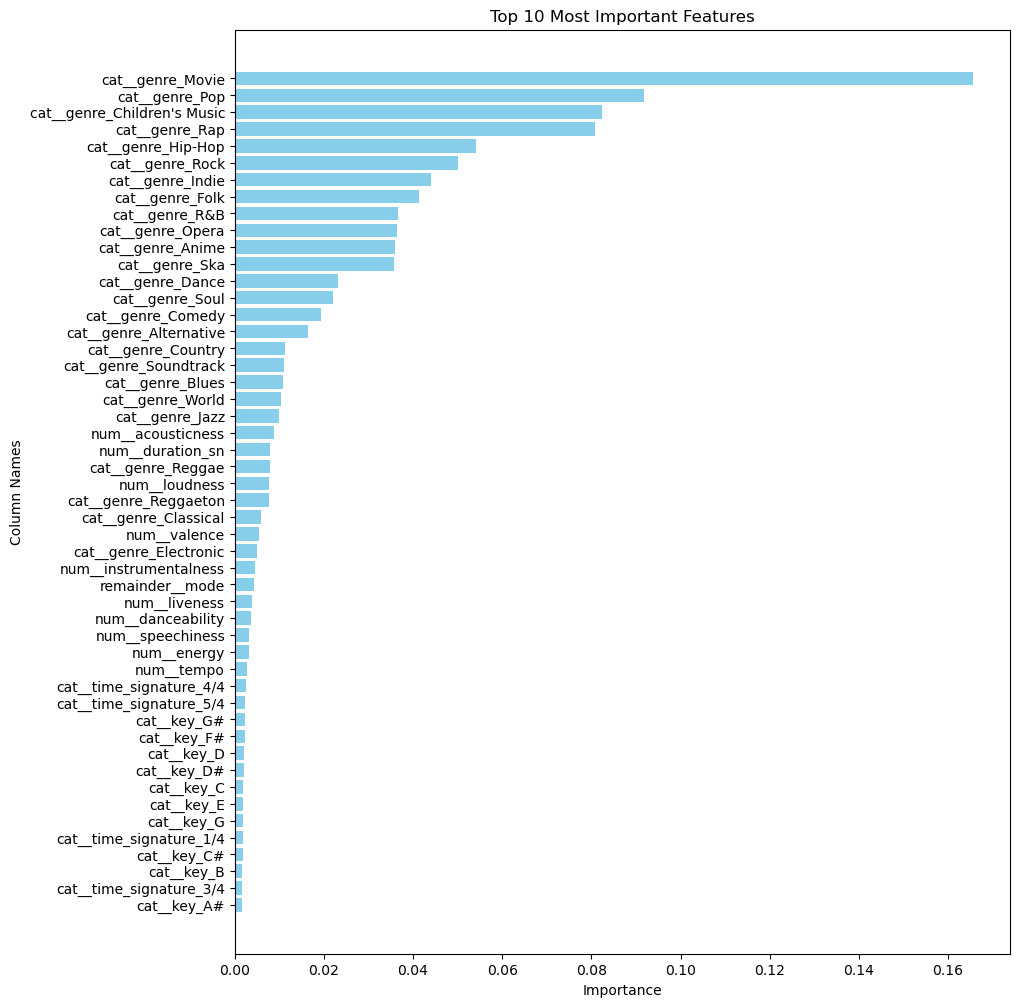

In [80]:
# Visualize feature importances

import matplotlib.pyplot as plt

# Take top 10 features
top_features = feature_importance.head(50)

# Plot
plt.figure(figsize=(10,12))
plt.barh(top_features['column_names'].astype(str), top_features['importance'], color='skyblue')
plt.gca().invert_yaxis()  # highest importance at the top
plt.xlabel('Importance')
plt.ylabel('Column Names')
plt.title('Top 10 Most Important Features')
plt.show()